In [243]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import * 

#plotnine set theme
theme_set(theme_light())

In [244]:
recent_grads = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-10-16/recent-grads.csv")
recent_grads

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


### Columns and their data types

In [245]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

## Most common majors and most common categories?

In [246]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


### Most common Majors category

What major categories (e.g. engineering, psychology, business) were the most common?

In [247]:
most_common_category = recent_grads.groupby('Major_category')['Total'].sum().sort_values(ascending=False).reset_index()
most_common_category

,Major_category,Total
0,Business,1302376.0
1,Humanities & Liberal Arts,713468.0
2,Education,559129.0
3,Engineering,537583.0
4,Social Science,529966.0
5,Psychology & Social Work,481007.0
6,Health,463230.0
7,Biology & Life Science,453862.0
8,Communications & Journalism,392601.0
9,Arts,357130.0


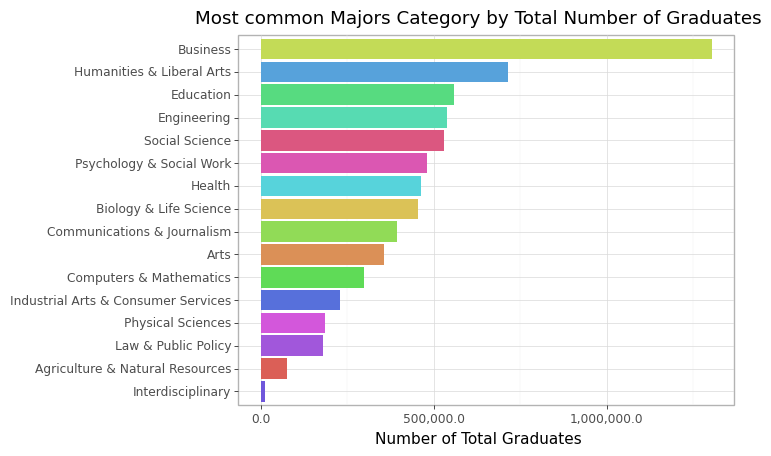

<ggplot: (142630293209)>

In [248]:
(
    ggplot(data = most_common_category)
    + geom_col(aes(x = 'Major_category', y = 'Total', fill = 'Major_category'))
    + scale_x_discrete(limits = most_common_category['Major_category'].to_list()[::-1])
    + scale_y_continuous(labels = custom_format('{:,}'))
    + coord_flip()
    + labs(x = "", y = 'Number of Total Graduates', title = 'Most common Majors Category by Total Number of Graduates')
    + theme(legend_position = 'none')
)

### Most common Majors

What were the most common **majors**. (Since there were 173 majors, we look at only the top 20 most common ones)

In [249]:
most_common_major = recent_grads.groupby('Major').sum().sort_values(by = 'Total', ascending=False).reset_index()
most_common_major

,Major,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,PSYCHOLOGY,146,5200,393735.0,86648.0,307087.0,0.779933,2584,307933,233205,115172,174438,28169,0.083811,31500,24000,41000,125148,141860,48207
1,BUSINESS MANAGEMENT AND ADMINISTRATION,77,6203,329927.0,173809.0,156118.0,0.473190,4212,276234,251540,50357,199897,21502,0.072218,38000,29000,50000,36720,148395,32395
2,BIOLOGY,124,3600,280709.0,111762.0,168947.0,0.601858,1370,182295,144512,72371,100336,13874,0.070725,33400,24000,45000,88232,81109,28339
3,GENERAL BUSINESS,58,6200,234590.0,132238.0,102352.0,0.436302,2380,190183,171385,36241,138299,14946,0.072861,40000,30000,55000,29334,100831,27320
4,COMMUNICATIONS,94,1901,213996.0,70619.0,143377.0,0.669999,2394,179633,147335,49889,116251,14602,0.075177,35000,27000,45000,40763,97964,27440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,34,2411,720.0,488.0,232.0,0.322222,5,604,524,126,396,49,0.075038,50000,42800,57000,501,50,49
169,SOIL SCIENCE,113,1106,685.0,476.0,209.0,0.305109,4,613,488,185,383,0,0.000000,35000,18500,44000,355,144,0
170,MATHEMATICS AND COMPUTER SCIENCE,53,4005,609.0,500.0,109.0,0.178982,7,559,584,0,391,0,0.000000,42000,30000,78000,452,67,25
171,MILITARY TECHNOLOGIES,74,3801,124.0,124.0,0.0,0.000000,4,0,111,0,111,0,0.000000,40000,40000,40000,0,0,0


Since there are 173 majors, I will only look at the top 20 majors. 

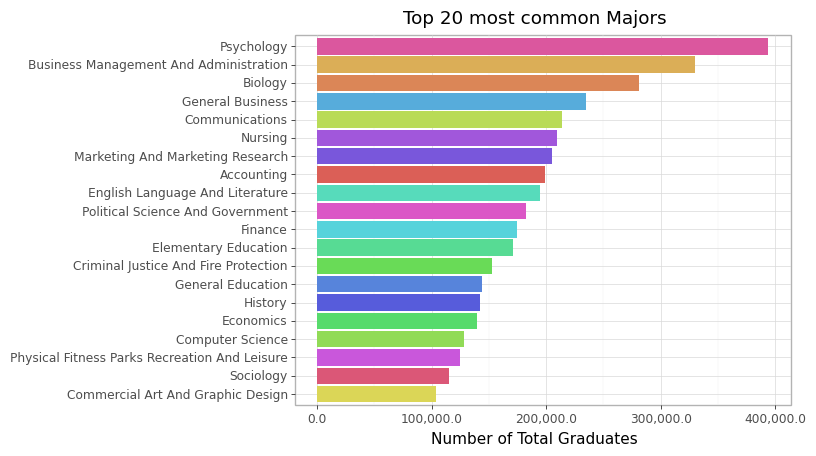

<ggplot: (142627346863)>

In [250]:
from mizani.formatters import custom_format
(
    ggplot(data = most_common_major.head(20))
    + geom_col(aes(x = 'Major', y = 'Total', fill = 'Major'))
    + scale_x_discrete(limits = most_common_major['Major'].head(20).to_list()[::-1], labels = [item.title() for item in most_common_major['Major'].head(20).to_list()[::-1]])
    + scale_y_continuous(labels = custom_format('{:,}'))
    + coord_flip()
    + labs(x = "", y = 'Number of Total Graduates', title = 'Top 20 most common Majors')
    + theme(legend_position = 'none')
)

### Median Salary distribution -> looks interesting 

<AxesSubplot:xlabel='Median', ylabel='Count'>

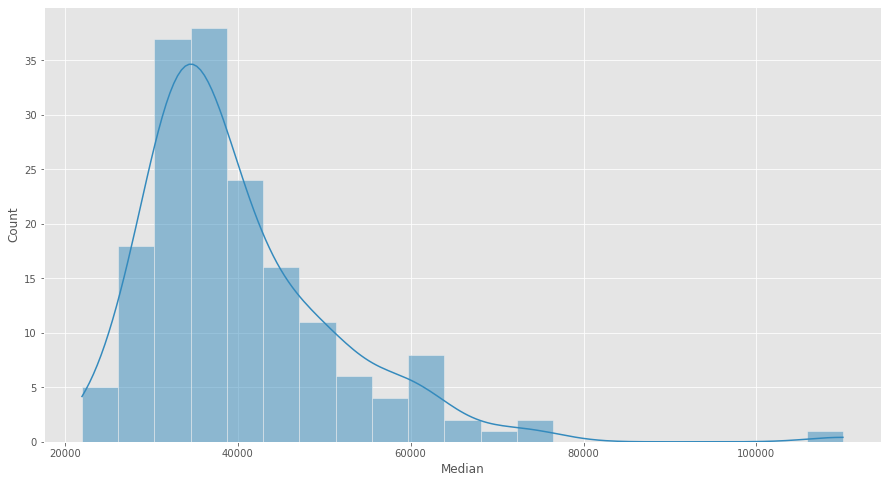

In [251]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.histplot(x = recent_grads['Median'], kde=True)

In [252]:
recent_grads['Median'].mean()

40151.4450867052

## What category of majors make the most money?

#### Can look at boxplot and barplot per major_category to understand the distributions in each category. 

Instead of showing a histogram, I can summarize and groupby the major_category to get the median salary for each major_category. 

In [253]:
median_per_major = recent_grads[['Median', 'Major_category']].groupby('Major_category').median().sort_values('Median', ascending=False).reset_index()
median_per_major

,Major_category,Median
0,Engineering,57000
1,Computers & Mathematics,45000
2,Business,40000
3,Physical Sciences,39500
4,Social Science,38000
5,Biology & Life Science,36300
6,Law & Public Policy,36000
7,Agriculture & Natural Resources,35000
8,Communications & Journalism,35000
9,Health,35000


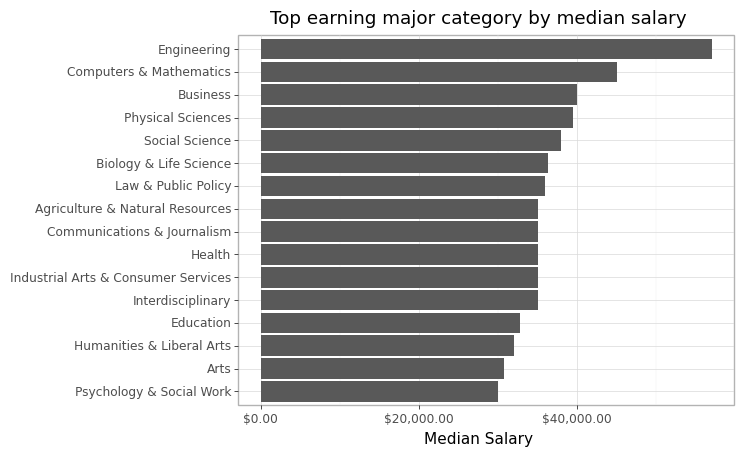

<ggplot: (142625265905)>

In [254]:
from mizani.formatters import currency_format
(
    ggplot(median_per_major, aes(x = 'Major_category', y = 'Median'))
    + geom_col()
    + scale_x_discrete(limits = median_per_major['Major_category'].to_list()[::-1])
    + scale_y_continuous(labels = currency_format('$', big_mark = ','))
    + coord_flip()
    + labs(title = 'Top earning major category by median salary', x = "", y = "Median Salary")
)

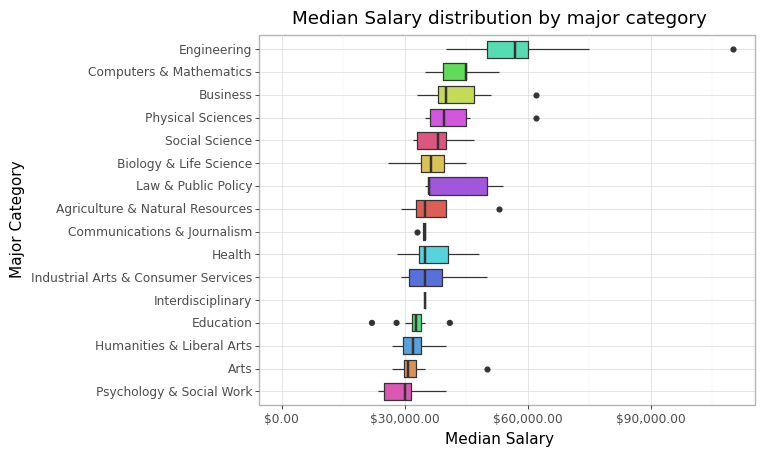

<ggplot: (142621238676)>

In [255]:
(
    ggplot(recent_grads, aes(x = 'Major_category', y = 'Median', fill = 'Major_category'))
    + geom_boxplot()
    + scale_x_discrete(limits = median_per_major['Major_category'].to_list()[::-1])
    + scale_y_continuous(labels = currency_format('$', big_mark = ','))
    + expand_limits(y = 0)
    + coord_flip()
    + labs(x = "Major Category", y = "Median Salary", title = 'Median Salary distribution by major category')
    + theme(legend_position='none')
)

A spectrum from STEM to liberal arts can be observed in terms of Median Salary

**NOTE :** I prefer box plots over bar plots. Box plots gives more information about distribution and bar plots are useful for explaining to users who don't have technical knowledge on how to read box plots.

## What are the highest earning majors?

Keep in mind we are looking at top 20 majors only and the not categories like in previous section

In [257]:
majors_processed = recent_grads[recent_grads['Sample_size'] > 100].sort_values('Median', ascending = False)
majors_processed

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
10,11,2407,COMPUTER ENGINEERING,41542.0,33258.0,8284.0,Engineering,0.199413,399,32506,30315,5146,23621,2275,0.065409,60000,45000,75000,23694,5721,980
11,12,2401,AEROSPACE ENGINEERING,15058.0,12953.0,2105.0,Engineering,0.139793,147,11391,11106,2724,8790,794,0.065162,60000,42000,70000,8184,2425,372
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,71298,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,55450,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,161,2201,COSMETOLOGY SERVICES AND CULINARY ARTS,10510.0,4364.0,6146.0,Industrial Arts & Consumer Services,0.584776,117,8650,7662,2064,5949,510,0.055677,29000,20000,36000,563,7384,3163
162,163,5502,ANTHROPOLOGY AND ARCHEOLOGY,38844.0,11376.0,27468.0,Humanities & Liberal Arts,0.707136,247,29633,20147,14515,13232,3395,0.102792,28000,20000,38000,9805,16693,6866
164,165,2307,EARLY CHILDHOOD EDUCATION,37589.0,1167.0,36422.0,Education,0.968954,342,32551,27569,7001,20748,1360,0.040105,28000,21000,35000,23515,7705,2868
166,167,6001,DRAMA AND THEATER ARTS,43249.0,14440.0,28809.0,Arts,0.666119,357,36165,25147,15994,16891,3040,0.077541,27000,19200,35000,6994,25313,11068


Looks like petroleum engineering is an outlier if you compare the box plot for histogram and the above table (110k salary). 

In [258]:
[item.title() for item in majors_processed['Major'].head(20).to_list()[::-1]]

['Computer And Information Systems',
 'Mathematics',
 'Accounting',
 'Business Economics',
 'Economics',
 'Finance',
 'Nursing',
 'Miscellaneous Engineering',
 'Operations Logistics And E-Commerce',
 'Construction Services',
 'Civil Engineering',
 'Management Information Systems And Statistics',
 'Computer Science',
 'General Engineering',
 'Industrial And Manufacturing Engineering',
 'Electrical Engineering',
 'Mechanical Engineering',
 'Aerospace Engineering',
 'Computer Engineering',
 'Chemical Engineering']

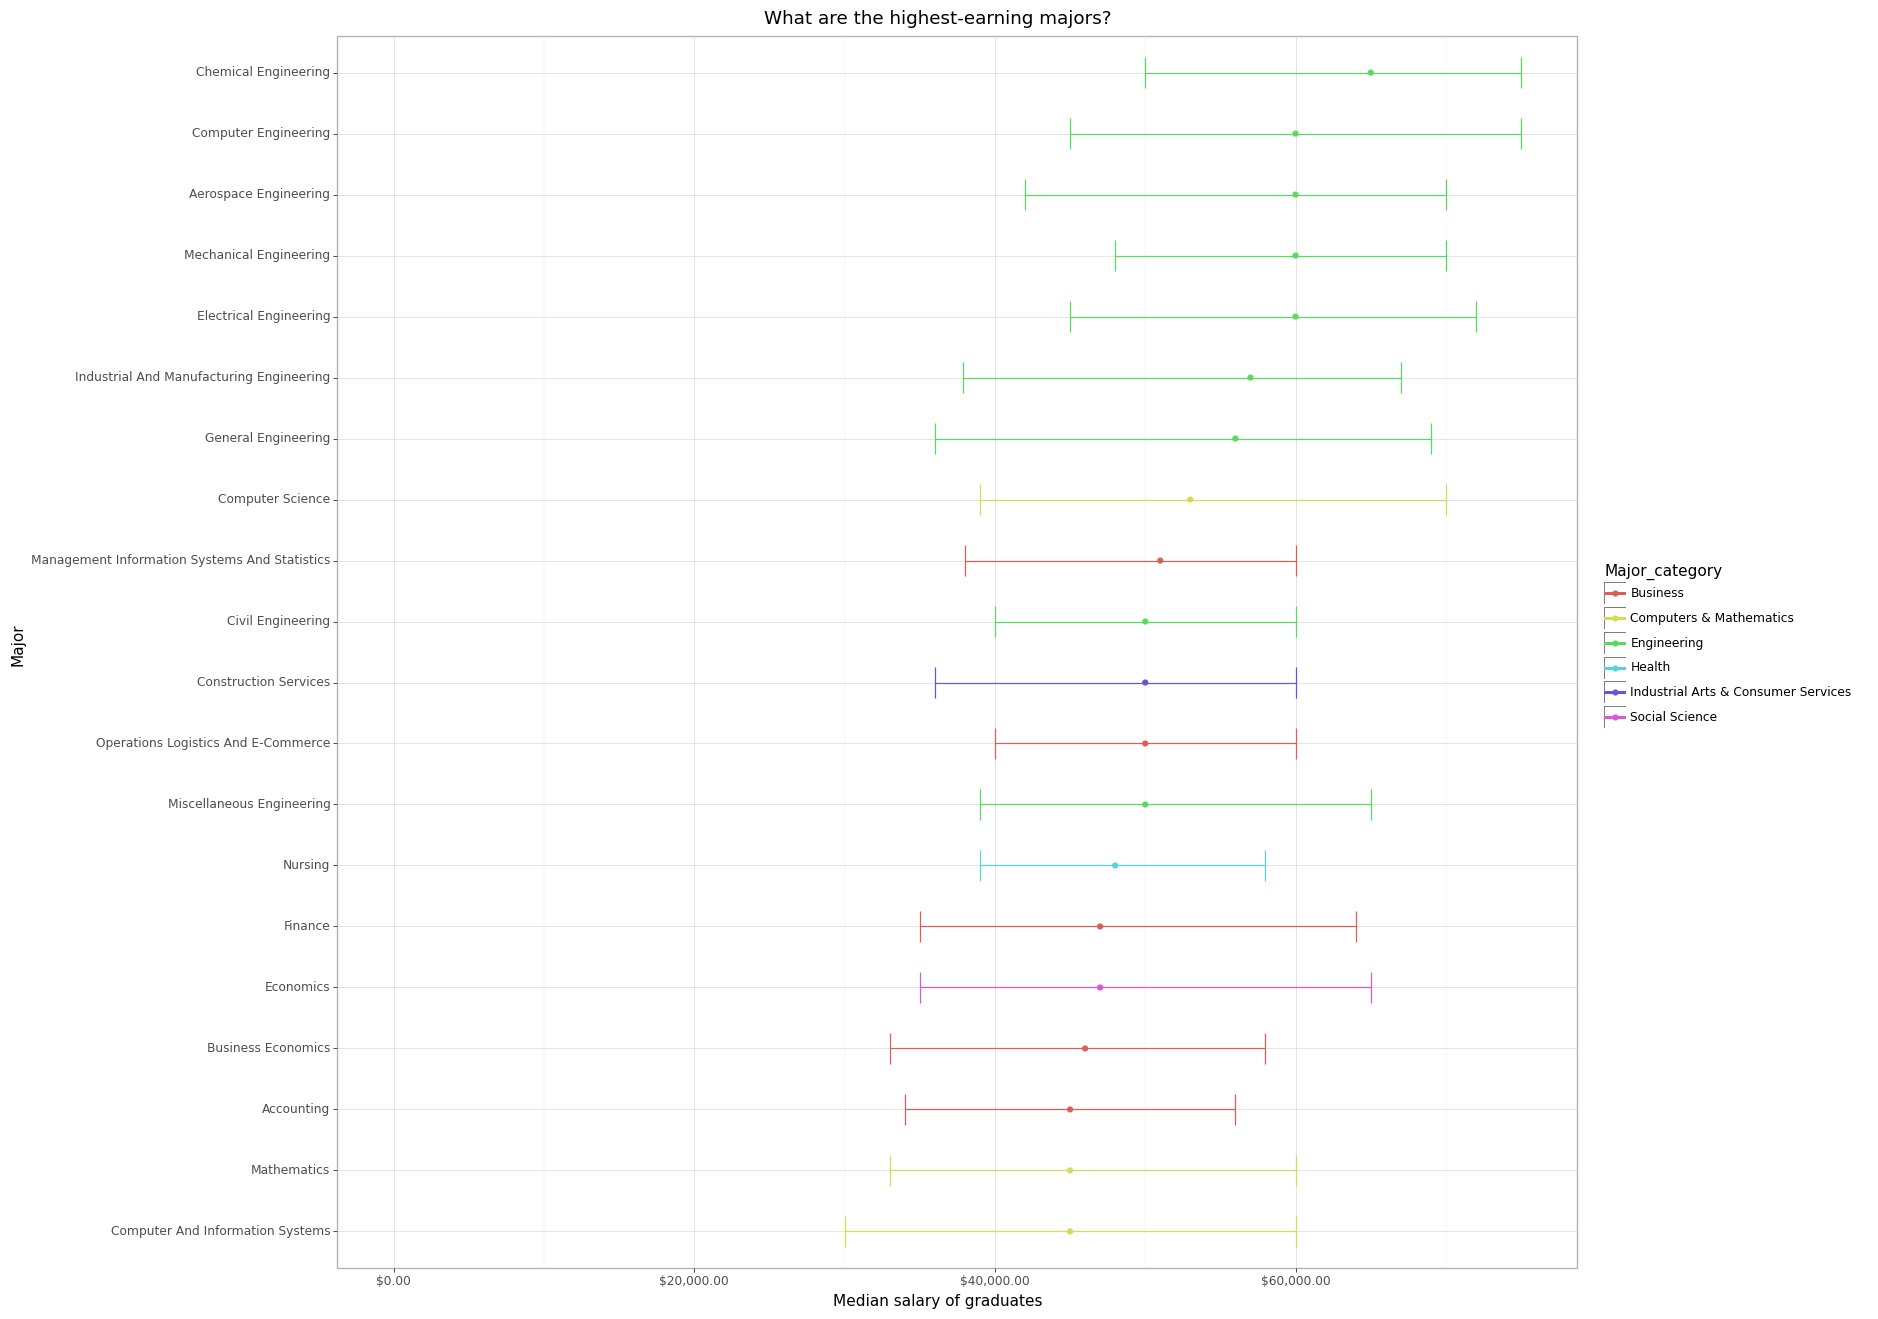

<ggplot: (142624768991)>

In [259]:
(
    ggplot(data = majors_processed.head(20)) 
    + geom_point(aes('Major', 'Median', color = 'Major_category'))
    + scale_x_discrete(labels = [item.title() for item in majors_processed['Major'].head(20).to_list()[::-1]], limits = majors_processed['Major'].head(20).to_list()[::-1]) 
    + geom_errorbar(aes(x = 'Major', ymin = 'P25th', ymax = 'P75th', color = 'Major_category'))
    + expand_limits(y=0)
    + scale_y_continuous(labels = currency_format('$', big_mark = ',')) 
    + labs(title = 'What are the highest-earning majors?', x = "Major", y = 'Median salary of graduates')
    + coord_flip()
    + theme(figure_size=(16, 16))
)

One important observation is that 25th Percentile of Median salary Petroleum Engineering is higher than 75th Percentile of most Majors. 

## What are the lowest earning majors?

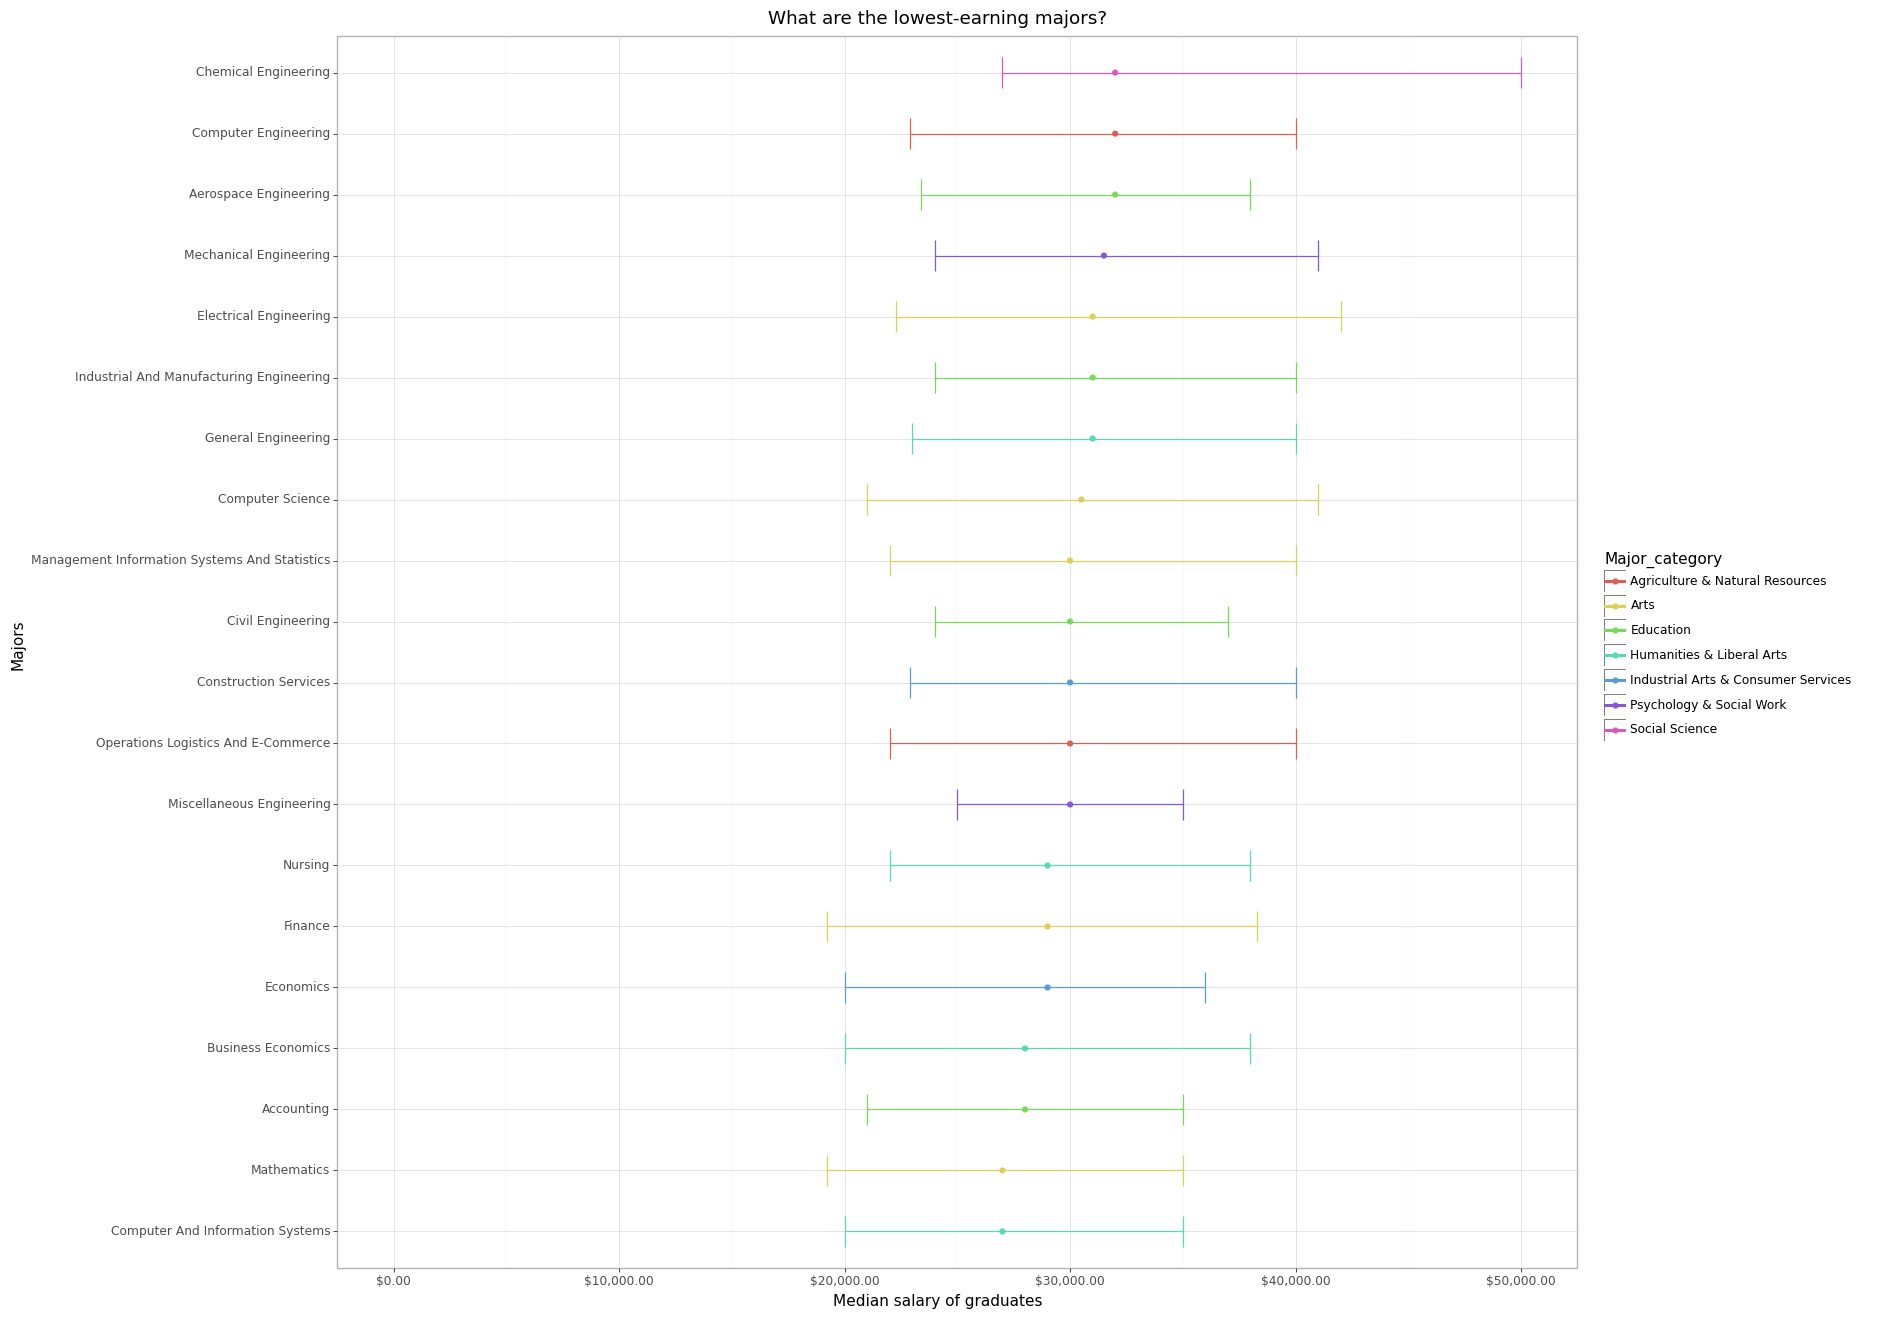

<ggplot: (142621418942)>

In [260]:
(
    ggplot(data = majors_processed.tail(20)) 
    + geom_point(aes('Major', 'Median', color = 'Major_category'))
    + scale_x_discrete(labels = [item.title() for item in majors_processed['Major'].head(20).to_list()[::-1]], limits = majors_processed['Major'].tail(20).to_list()[::-1]) 
    + geom_errorbar(aes(x = 'Major', ymin = 'P25th', ymax = 'P75th', color = 'Major_category'))
    + scale_y_continuous(labels = currency_format('$', big_mark = ','))
    + expand_limits(y=0) 
    + labs(title = 'What are the lowest-earning majors?', x = "Majors", y = 'Median salary of graduates')
    + coord_flip()
    + theme(figure_size=(16, 16))
)


One point to note is that Sample Size tells us how many people were surveyed and based on those the salaries are given. Thus, if a sample size is too small I will ignore it and wouldn't want to trust it. 

Keep only Majors having sample size > 100. I will go back and edit the graphs to filter on sample size > 100

#### Go back, look at the data. Figure out a new question to answer. Find out the most interesting columns.

## How does gender breakdown relate to typical earnings?

I want to show the breakdown of top majors by Gender i.e. a stacked bar plot where 2 colors would be men and women (Gender) 

In [261]:
recent_grads

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


In [262]:
gender_earnings = recent_grads.sort_values('Total', ascending=False).head(20).melt(id_vars = ['Major', 'Major_category', 'Total'], value_vars= ['Men', 'Women'], var_name='Gender', value_name='Number')
gender_earnings

,Major,Major_category,Total,Gender,Number
0,PSYCHOLOGY,Psychology & Social Work,393735.0,Men,86648.0
1,BUSINESS MANAGEMENT AND ADMINISTRATION,Business,329927.0,Men,173809.0
2,BIOLOGY,Biology & Life Science,280709.0,Men,111762.0
3,GENERAL BUSINESS,Business,234590.0,Men,132238.0
4,COMMUNICATIONS,Communications & Journalism,213996.0,Men,70619.0
5,NURSING,Health,209394.0,Men,21773.0
6,MARKETING AND MARKETING RESEARCH,Business,205211.0,Men,78857.0
7,ACCOUNTING,Business,198633.0,Men,94519.0
8,ENGLISH LANGUAGE AND LITERATURE,Humanities & Liberal Arts,194673.0,Men,58227.0
9,POLITICAL SCIENCE AND GOVERNMENT,Social Science,182621.0,Men,93880.0


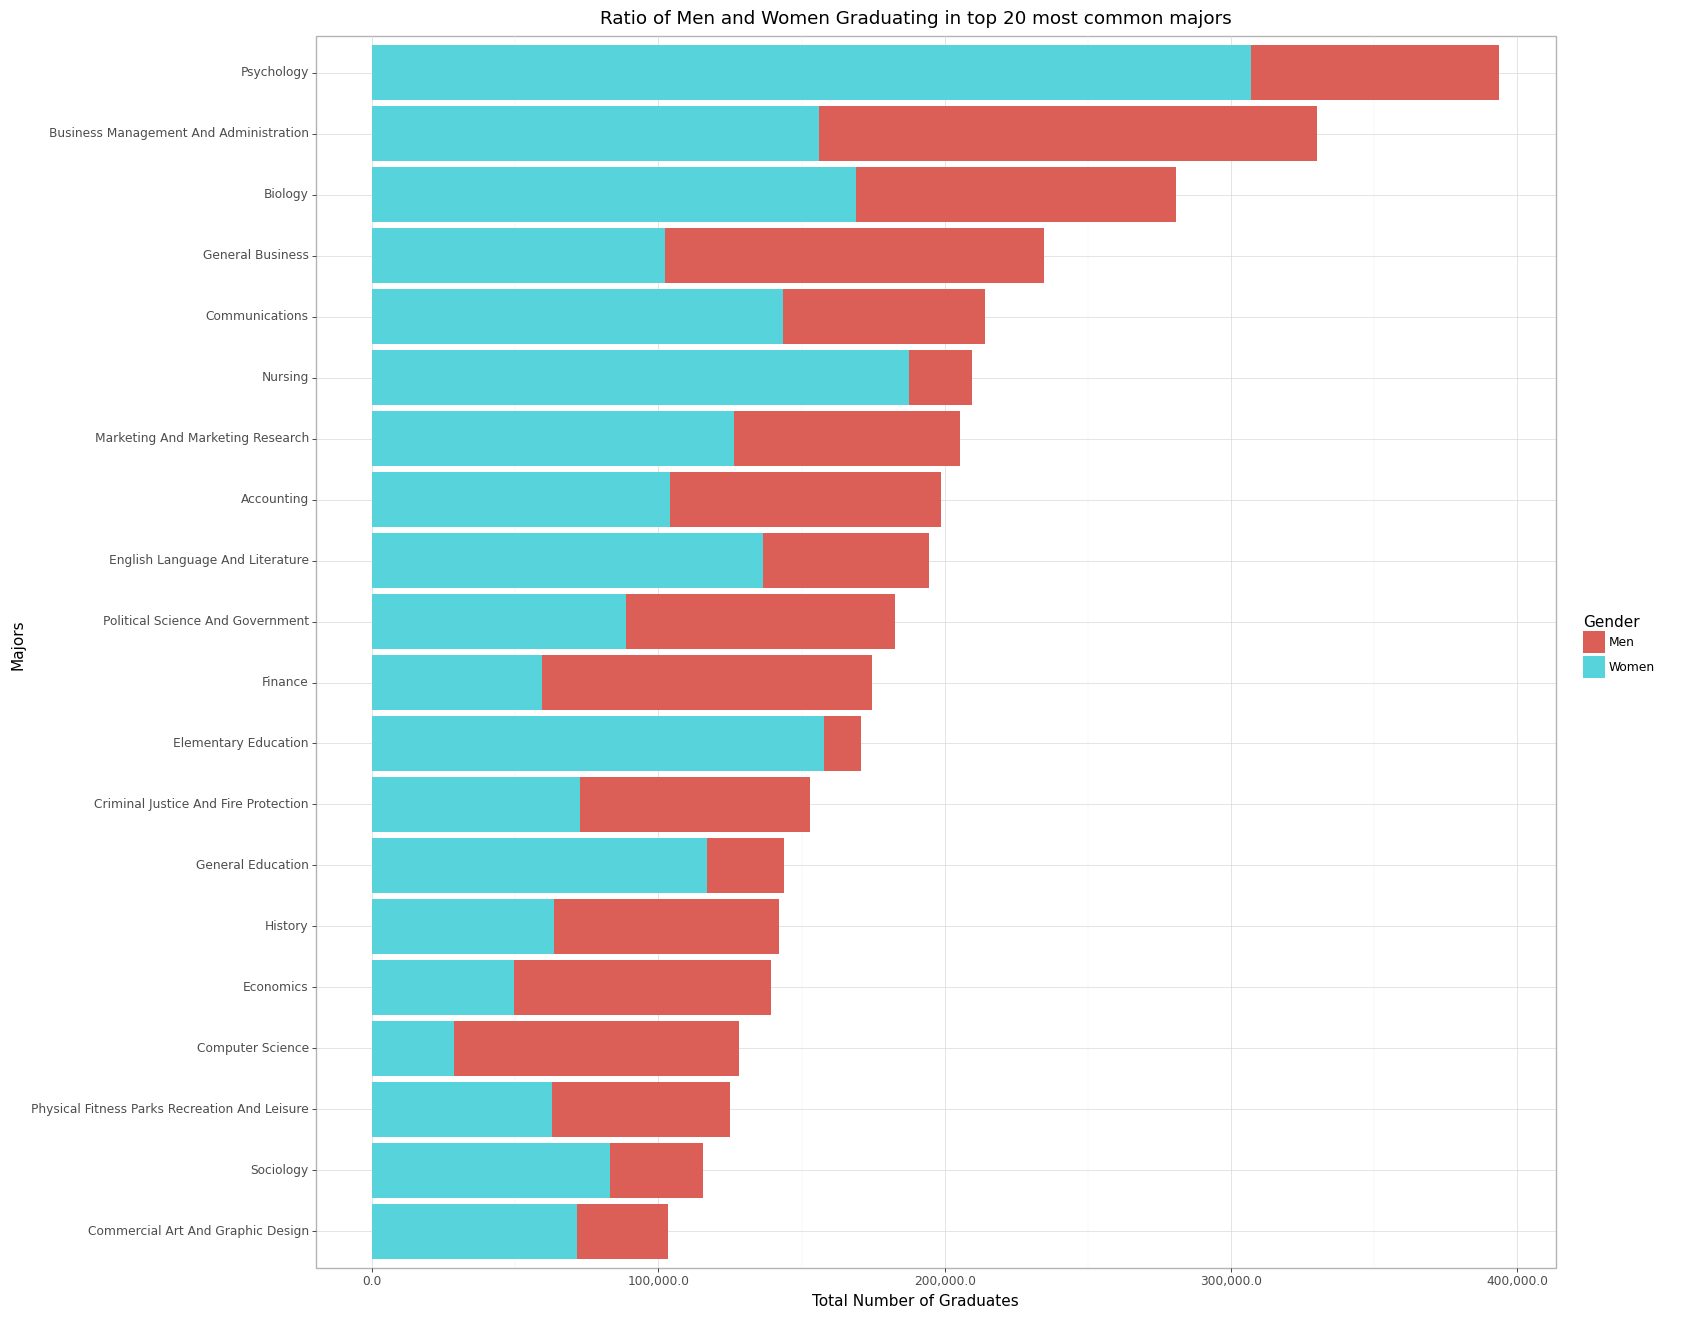

<ggplot: (142627613895)>

In [263]:
(
    ggplot(gender_earnings, aes(x = 'Major', y = 'Number', fill = 'Gender'))
    + geom_col()
    + scale_x_discrete(limits = gender_earnings['Major'].head(20).to_list()[::-1], labels = [item.title() for item in gender_earnings['Major'].head(20).to_list()[::-1]])
    + scale_y_continuous(labels = custom_format('{:,}'))
    + coord_flip()
    + labs(title = 'Ratio of Men and Women Graduating in top 20 most common majors', x = "Majors", y = 'Total Number of Graduates')
    + theme(figure_size=(16, 16))
)


The earlier graph where we plot top 20 most common majors doesn't have this breakdown of gender. Hence if you want you can remove that and use this instead. 